In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [2]:
#Load the dataset
df=pd.read_csv("C:\\Users\\YOMIJAY\\Documents\\Data science training\\10Alytics\\Assignments\\Employee.csv")

## Exploratory Data Analysis  

In [12]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [8]:
#Check for the dimensionality 
df.shape

(4653, 9)

In [13]:
#Check for missing values.
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [14]:
# Display the unique values of the categorical columns
print("Education",df['Education'].unique())
print("City",df['City'].unique())
print("Gender",df['Gender'].unique())
print("EverBenched",df['EverBenched'].unique())

Education ['Bachelors' 'Masters' 'PHD']
City ['Bangalore' 'Pune' 'New Delhi']
Gender ['Male' 'Female']
EverBenched ['No' 'Yes']


In [3]:
#Encoding the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [4]:
#Transformation of categorical data into numerical data 

df["Education"]=le.fit_transform(df["Education"])
df["City"]=le.fit_transform(df["City"])
df["Gender"]=le.fit_transform(df["Gender"])
df["EverBenched"]=le.fit_transform(df["EverBenched"])

df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


<AxesSubplot:>

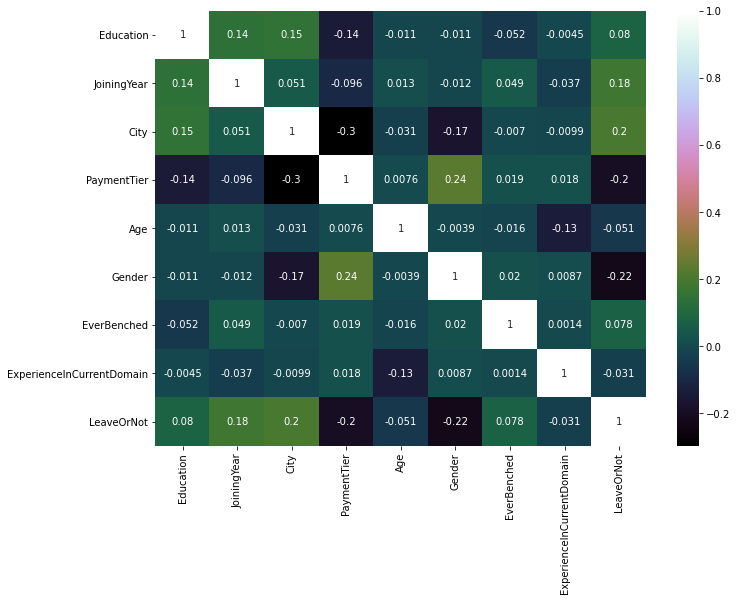

In [30]:
#correlation 

plt.figure(figsize=(11,8))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix')

In [7]:
## MACHINE LEARNING
#Split data set into training and test set.
#remove label to be predicted from the dataset ( LeaveOrNot)
x=df.drop("LeaveOrNot", axis=1) #dataset without the label( LeaveOrNot)
y=df["LeaveOrNot"] #LeaveOrNot

In [8]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: LeaveOrNot, dtype: int64

In [9]:
x.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2017,0,3,34,1,0,0
1,0,2013,2,1,28,0,0,3
2,0,2014,1,3,38,0,0,2
3,1,2016,0,3,27,1,0,5
4,1,2017,2,3,24,1,1,2


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.4)
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", x_test.shape)


x_train:  (2791, 8)
x_test:  (1862, 8)
y_train:  (2791,)
y_test:  (1862, 8)


In [40]:
from sklearn.ensemble import AdaBoostClassifier
abc =AdaBoostClassifier()

model=abc.fit(x_train, y_train)

In [41]:
#To confirm AdaBoostClassifier prediction
pred= model.predict(x_test)
print(pred)

[0 0 1 ... 0 0 0]


In [13]:
from sklearn.metrics import accuracy_score
print("The accuracy for AdaBoost is:", round(accuracy_score(y_test,pred)*100),"%")

The accuracy for AdaBoost is: 80 %


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#machine learning matrices
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [61]:
classifiers = [
    [RandomForestClassifier(), "Random Forest"],
    [XGBClassifier(), "XGB Classifier"],
    [KNeighborsClassifier(), "K-Nearest Neighbors"],
    [SGDClassifier(), "SGD"],
    [SVC(), "Support Vector Machine"],
    [GaussianNB(), "Naive Bayes"],
    [DecisionTreeClassifier(), "Decision Tree"],
    [LogisticRegression(), "Logistics Regression"]
]

In [62]:
score_list = {}
cross_val = {}
roc_auc = {}
accuracy_s = {}
for i in classifiers:
    model = i[0]
    model.fit(x_train, y_train)
    model_name = i[1]
    pred = model.predict(x_test)
    score = model.score(x_test, y_test)
    CV = cross_val_score(model, x_test, y_test).mean()
    RA = roc_auc_score(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    score_list[model_name] = ([str(round(score*100, 2)) + "%"])
    cross_val[model_name] = ([str(round(CV *100, 2)) + '%'])
    accuracy_s[model_name] = ([str(round(accuracy*100, 2)) + "%"])
    roc_auc[model_name] = ([str(round(RA*100, 2)) + "%"])
    if model_name != classifiers[-1][1]:
        print("")


[02:28:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\YOMIJAY\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\YOMIJAY\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:28:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\YOMIJAY\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:28:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\YOMIJAY\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:28:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\YOMIJAY\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:28:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\YOMIJAY\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:28:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.








C:\Users\YOMIJAY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\YOMIJAY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [63]:
print("Accuracy Score")
AS = pd.DataFrame(score_list)
AS.head()

Accuracy Score


,Random Forest,XGB Classifier,K-Nearest Neighbors,SGD,Support Vector Machine,Naive Bayes,Decision Tree,Logistics Regression
0,82.33%,83.94%,78.89%,65.31%,65.31%,68.9%,81.42%,70.68%


In [65]:
print("cross validation")
cross_v=pd.DataFrame(cross_val)
cross_v.head()

cross validation


,Random Forest,XGB Classifier,K-Nearest Neighbors,SGD,Support Vector Machine,Naive Bayes,Decision Tree,Logistics Regression
0,80.72%,81.63%,74.87%,54.67%,65.31%,68.9%,78.25%,70.68%


In [66]:
print("roc_auc")
roc_a=pd.DataFrame(roc_auc)
roc_a.head()

roc_auc


,Random Forest,XGB Classifier,K-Nearest Neighbors,SGD,Support Vector Machine,Naive Bayes,Decision Tree,Logistics Regression
0,78.78%,79.87%,73.5%,50.0%,50.0%,63.17%,78.41%,61.98%
